In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)

# Feature Selection and Engineering

In [55]:
# all features become categorical for homogeneity
# we only keep possibly relevant features
# we will also do a dimensionality reduction because a lot of features are highly correlated

mapping_dict = {
    "GENHLTH": lambda value: value if value <= 5 else -1,
    "PHYSHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "MENTHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "POORHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "HLTHPLN1": lambda value: 1 if value == 1 else 0,
    "MEDCOST": lambda value: 1 if value == 1 else 0,
    "CHECKUP1": lambda value: value if value <= 4 or value==8 else -1,
    "BPHIGH4": lambda value: 1 if value == 1 else 0,
    "BPMEDS": lambda value: 1 if value == 1 else 0,
    "BLOODCHO": lambda value: 1 if value == 1 else 0,
    "CHOLCHK": lambda value: value if value <= 4 else -1,
    # "CVDINFR4": lambda value: 1 if value == 1 else 0,
    # "CVDCRHD4": lambda value: 1 if value == 1 else 0,
    "TOLDHI2": lambda value: 1 if value == 1 else 0,
    "CVDSTRK3": lambda value: 1 if value == 1 else 0,
    "ASTHMA3": lambda value: 1 if value == 1 else 0,
    "ASTHNOW": lambda value: 1 if value == 1 else 0,
    "CHCSCNCR": lambda value: 1 if value == 1 else 0,
    "CHCOCNCR": lambda value: 1 if value == 1 else 0,
    "CHCCOPD1": lambda value: 1 if value == 1 else 0,
    "HAVARTH3": lambda value: 1 if value == 1 else 0,
    "ADDEPEV2": lambda value: 1 if value == 1 else 0,
    "CHCKIDNY": lambda value: 1 if value == 1 else 0,
    "DIABETE3": lambda value: 1 if value == 1 else 0,
    "SEX": lambda value: 1 if value == 1 else 0,
    "MARITAL": lambda value: value,
    "EDUCA": lambda value: value,
    "VETERAN3": lambda value: 1 if value == 1 else 0,
    "INCOME2": lambda value: value if value <= 8 else -1,
    "INTERNET": lambda value: 1 if value == 1 else 0,
    "WTKG3": lambda value: 77 if value <= 77 else 132 if value <= 132 else 187 if value <= 187 else 242 if value <= 242 else 295 if value <= 295 else -1,
    "QLACTLM2": lambda value: 1 if value == 1 else 0,
    "USEEQUIP": lambda value: 1 if value == 1 else 0,
    "BLIND": lambda value: 1 if value == 1 else 0,
    "DECIDE": lambda value: 1 if value == 1 else 0,
    "DIFFWALK": lambda value: 1 if value == 1 else 0,
    "DIFFDRES": lambda value: 1 if value == 1 else 0,
    "DIFFALON": lambda value: 1 if value == 1 else 0,
    "SMOKE100": lambda value: 1 if value == 1 else 0,
    "SMOKDAY2": lambda value: value if value <= 3 else -1,
    "LASTSMK2": lambda value: value if value <= 8 else -1,
    "USENOW3": lambda value: value if value <= 3 else -1,
    "AVEDRNK2": lambda value: str(value//20) if value <=76 else -1,
    "DRNK3GE5": lambda value: str(value//20) if value <=76 else -1,
    "EXERANY2": lambda value: 1 if value == 1 else 0,
    # "EXERHMM1": lambda value: str(value//200) if value <= 959 and value not in [777,999] else -1,
    "LMTJOIN3": lambda value: value if value <= 2 else -1,
    "FLUSHOT6": lambda value: 1 if value == 1 else 0,
    "PDIABTST": lambda value: 1 if value == 1 else 0,
    "PREDIAB1": lambda value: 1 if value == 1 else 0,
    "INSULIN": lambda value: 1 if value == 1 else 0,
    "CIMEMLOS": lambda value: 1 if value == 1 else 0,
    "_RFHLTH": lambda value: value if value <= 2 else -1,
    "_HCVU651": lambda value: value if value <= 2 else -1,
    "_RFHYPE5": lambda value: value if value <= 2 else -1,
    "_CHOLCHK": lambda value: value if value <= 3 else -1,
    "_RFCHOL": lambda value: value if value <= 2 else -1,
    # "_MICHD": lambda value: value if value <= 2 else -1,
    "_LTASTH1": lambda value: value if value <= 2 else -1,
    "_CASTHM1": lambda value: value if value <= 2 else -1,
    "_DRDXAR1": lambda value: 1 if value == 1 else 0,
    "_AGEG5YR": lambda value: value,
    "_AGE_G": lambda value: value,
    "HTM4": lambda value: 1.50 if value <= 1.50 else 1.60 if value <= 1.60 else 1.75 if value <= 1.75 else 1.90 if value <= 1.90 else 2.00 if value > 1.90 else -1,
    "_RFBMI5": lambda value: 1 if value == 2 else 0,
    "_EDUCAG": lambda value: value if value <= 4 else -1,
    "_SMOKER3": lambda value: value if value <= 3 else -1,
    "_RFBING5": lambda value: 1 if value == 2 else 0,
    "_BMI5CAT": lambda value: value if value <= 4 else -1,
    "_RFDRHV5": lambda value: 1 if value == 2 else 0,
    "FTJUDA1_": lambda value: 0 if value == 0 else 10 if value <= 10 else 30 if value <= 30 else 70 if value <= 70 else 99 if value <=99 else -1,
    "MAXVO2_": lambda value: value//10 if value <= 50 else -1,
    "ACTIN11_": lambda value: value if value <= 2 else -1,
    "ACTIN21_": lambda value: value if value <= 2 else -1,
    "_PACAT1": lambda value: value if value <= 9 else -1,
    "_PA150R2": lambda value: value if value <= 9 else -1,
    "_PA300R2": lambda value: value if value <= 9 else -1,
    "_PASTRNG":  lambda value: value if value <= 9 else -1,
    "_PASTAE1": lambda value: value if value <= 9 else -1,
    "_LMTACT1": lambda value: value if value <= 9 else -1,
    "_LMTWRK1": lambda value: value if value <= 3 else -1,
    "_LMTSCL1": lambda value: value if value <= 4 else -1,
    "_INCOMG": lambda value: value if value <= 5 else -1
}


In [103]:
# for each feature in mapping_dict, check the ratio of nan values in x_train and keep only the ones with less than 10%
# The features with a high nan value ratio won't be too useful and are in anyway correlated with other features

def select_features_with_low_nan_ratio(x_train, features, threshold=0.1):
    nan_ratios = {}
    for feature in features:
        nan_ratios[feature] = np.sum(np.isnan(x_train[:, features == feature])) / len(x_train)

    selected_features = [feature for feature in nan_ratios if nan_ratios[feature] < threshold]

    print(f"Selected {len(selected_features)} features over {len(features)}")
    print(nan_ratios)
    return selected_features

selected_features = select_features_with_low_nan_ratio(x_train, features)

Selected 140 features over 322
{'Id': 0.0, '_STATE': 0.0, 'FMONTH': 0.0, 'IDATE': 0.0, 'IMONTH': 0.0, 'IDAY': 0.0, 'IYEAR': 0.0, 'DISPCODE': 0.0, 'SEQNO': 0.0, '_PSU': 0.0, 'CTELENUM': 0.4248708610785195, 'PVTRESD1': 0.4248708610785195, 'COLGHOUS': 0.9999024791625398, 'STATERES': 0.42487390860469015, 'CELLFON3': 0.4248708610785195, 'LADULT': 0.9999024791625398, 'NUMADULT': 0.4249257165495909, 'NUMMEN': 0.4252030414311183, 'NUMWOMEN': 0.4252060889572889, 'CTELNUM1': 0.5751291389214805, 'CELLFON2': 0.5751291389214805, 'CADULT': 0.5751321864476511, 'PVTRESD2': 0.5751291389214805, 'CCLGHOUS': 0.9975589315373246, 'CSTATE': 0.5751260913953099, 'LANDLINE': 0.5768570862602282, 'HHADULT': 0.5867828789979734, 'GENHLTH': 6.095052341261981e-06, 'PHYSHLTH': 3.0475261706309903e-06, 'MENTHLTH': 0.0, 'POORHLTH': 0.4871775336370701, 'HLTHPLN1': 0.0, 'PERSDOC2': 0.0, 'MEDCOST': 3.0475261706309903e-06, 'CHECKUP1': 3.0475261706309903e-06, 'BPHIGH4': 3.0475261706309903e-06, 'BPMEDS': 0.5983330031846649, 'B

In [78]:
# apply the mapping to the selected features and keep only those in the training

print(x_train.shape)

def apply_mapping(x_train, selected_features, mapping_dict):
    x_train_filtered = np.zeros((x_train.shape[0], len(selected_features)))
    for feature in selected_features:
        feature_values = x_train[:, features == feature].flatten()
        if feature_values.size > 0:
            x_train_filtered[:, selected_features.index(feature)] = np.array([mapping_dict[feature](value) for value in feature_values])
    return x_train_filtered

x_train_filtered = apply_mapping(x_train, selected_features, mapping_dict)
print(x_train_filtered.shape)

(328135, 322)
(328135, 62)


# Visualizing the links between the features and the target

## plot proportion of y=1 for each value of a feature

In [6]:
# feature = "PHYSHLTH"
# print(x_train[:, features == feature].flatten())
# print("Max value:", np.nanmax(x_train[:, features == feature][x_train[:, features == feature] != 99.0]))
# print("Min value:", np.min(x_train[:, features == feature][~np.isnan(x_train[:, features == feature])]))

6


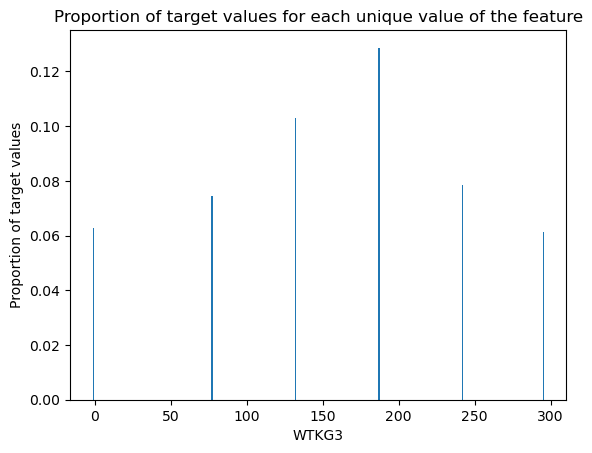

In [7]:
feature = "WTKG3" # categorical feature
feature_index = selected_features.index(feature)
feature_values = x_train_filtered[:, feature_index]
unique_values = np.unique(feature_values)
print(len(unique_values))
target_values = y_train[:, -1] # values in {1, -1}

# plot a bar plot (one bar for each unique value of the feature) showing the proportion of target values for each unique value of the feature
proportions = []
for value in unique_values:
    target_values_for_value = target_values[feature_values == value]
    proportions.append(np.sum(target_values_for_value == 1) / len(target_values_for_value))

plt.bar(unique_values, proportions)
plt.xlabel(feature)
plt.ylabel('Proportion of target values')
plt.title('Proportion of target values for each unique value of the feature')
plt.show()

## Normalized Mutual Information

In [8]:
print(selected_features)

['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BLOODCHO', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'VETERAN3', 'INCOME2', 'INTERNET', 'WTKG3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'EXERANY2', 'FLUSHOT6', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_CASTHM1', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'HTM4', '_RFBMI5', '_EDUCAG', '_SMOKER3', '_RFBING5', '_BMI5CAT', '_RFDRHV5', 'FTJUDA1_', 'MAXVO2_', '_PACAT1', '_PA150R2', '_PA300R2', '_PASTRNG', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_INCOMG']


In [9]:
import numpy as np

def calculate_feature_entropies(x_train_filtered, y_train, selected_features):
    # Function to calculate entropy
    def calculate_entropy(probabilities):
        # Calculate entropy: H(X) = -sum(p(x) * log2(p(x)))
        assert np.isclose(np.sum(probabilities), 1), f"Probabilities do not sum to 1: {np.sum(probabilities)}"
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    entropies = []
    entropies_normalized = []
    joint_entropies = []
    joint_entropies_normalized = []
    mutual_informations = []
    NMI = []

    # Filter the rows based on target values
    Y1 = x_train_filtered[y_train[:, 1] == 1]
    Y_minus1 = x_train_filtered[y_train[:, 1] == -1]

    # Total counts for probabilities
    count_Y1 = len(Y1)
    count_Y_minus1 = len(Y_minus1)
    total_count = count_Y1 + count_Y_minus1

    # Calculate probabilities of Y
    p_Y1 = count_Y1 / total_count
    p_Y_minus1 = count_Y_minus1 / total_count

    # Entropy of Y
    entropy_Y = calculate_entropy([p_Y1, p_Y_minus1])

    # Iterate over the indices of the features
    for feature in selected_features:
        feature_index = selected_features.index(feature)
        # Get the feature values for the entire dataset (to find all unique values)
        all_feature_values = x_train_filtered[:, feature_index]
        unique_values_all, counts_all = np.unique(all_feature_values, return_counts=True)

        # Get the feature values for the filtered rows where Y=1
        feature_values_Y1 = Y1[:, feature_index]
        non_nan_values_Y1 = feature_values_Y1[~np.isnan(feature_values_Y1)]

        # Get the counts for each unique value in filtered rows where Y=1
        unique_values_filtered_Y1, counts_filtered_Y1 = np.unique(non_nan_values_Y1, return_counts=True)

        # Create a dictionary for filtered counts where Y=1
        filtered_count_dict_Y1 = dict(zip(unique_values_filtered_Y1, counts_filtered_Y1))

        # Initialize the probabilities list for Y=1
        probabilities_Y1 = []

        # Calculate probabilities for Y=1
        for value in unique_values_all:
            count = filtered_count_dict_Y1.get(value, 0)  # Default to 0 if not found
            probabilities_Y1.append(count / np.sum(counts_filtered_Y1) if np.sum(counts_filtered_Y1) > 0 else 0)  # Probabilities

        # Compute the entropy for Y=1
        entropy_Y1 = calculate_entropy(probabilities_Y1)

        # Get the feature values for the filtered rows where Y=-1
        feature_values_Y_minus1 = Y_minus1[:, feature_index]
        non_nan_values_Y_minus1 = feature_values_Y_minus1[~np.isnan(feature_values_Y_minus1)]

        # Get the counts for each unique value in filtered rows where Y=-1
        unique_values_filtered_Y_minus1, counts_filtered_Y_minus1 = np.unique(non_nan_values_Y_minus1, return_counts=True)

        # Create a dictionary for filtered counts where Y=-1
        filtered_count_dict_Y_minus1 = dict(zip(unique_values_filtered_Y_minus1, counts_filtered_Y_minus1))

        # Initialize the probabilities list for Y=-1
        probabilities_Y_minus1 = []

        # Calculate probabilities for Y=-1
        for value in unique_values_all:
            count = filtered_count_dict_Y_minus1.get(value, 0)  # Default to 0 if not found
            probabilities_Y_minus1.append(count / np.sum(counts_filtered_Y_minus1) if np.sum(counts_filtered_Y_minus1) > 0 else 0)  # Probabilities

        # Compute the entropy for Y=-1
        entropy_Y_minus1 = calculate_entropy(probabilities_Y_minus1)

        # Calculate the joint entropy H(f|Y)
        joint_entropy = (p_Y1 * entropy_Y1) + (p_Y_minus1 * entropy_Y_minus1)

        # Normalize entropies
        entropy_normalized_Y1 = entropy_Y1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0
        entropy_normalized_Y_minus1 = entropy_Y_minus1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0

        # Append results
        entropies.append((entropy_Y1, entropy_Y_minus1))
        entropies_normalized.append((entropy_normalized_Y1, entropy_normalized_Y_minus1))
        joint_entropies.append(joint_entropy)
        joint_entropies_normalized.append(joint_entropy / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0)

        # Mutual information = H(F) - H(F|Y)
        entropy_feature = calculate_entropy(counts_all / np.sum(counts_all))
        mutual_information = (entropy_feature - joint_entropy) / np.log2(len(unique_values_all))
        mutual_informations.append(mutual_information)

        # Normalized mutual information
        NMI.append(2 * mutual_information / (entropy_Y + entropy_feature))

    return entropies, entropies_normalized, joint_entropies, joint_entropies_normalized, mutual_informations, NMI

entropies, entropies_normalized, joint_entropies, joint_entropies_normalized, mutual_informations, NMI = calculate_feature_entropies(x_train_filtered, y_train, selected_features)

In [10]:
# sum of the mutual information for each feature
print(np.sum(NMI))

0.7973488736551978


[('GENHLTH', 0.01321113640460762), ('PHYSHLTH', 0.009465773719164312), ('MENTHLTH', 0.001487180916286728), ('HLTHPLN1', 0.0032673803251792558), ('MEDCOST', 0.0005795253487274069), ('CHECKUP1', 0.0024800541453470137), ('BPHIGH4', 0.0478826544186464), ('BLOODCHO', 0.014636901441908828), ('CVDSTRK3', 0.0559481971302017), ('ASTHMA3', 0.0032167539973076615), ('CHCSCNCR', 0.009650875436771853), ('CHCOCNCR', 0.009686492535194857), ('CHCCOPD1', 0.042339928072805406), ('HAVARTH3', 0.02796113677382566), ('ADDEPEV2', 0.005429524363422098), ('CHCKIDNY', 0.026891298955736033), ('DIABETE3', 0.036962355781966265), ('SEX', 0.005068909697124422), ('MARITAL', 0.0036540298199253386), ('EDUCA', 0.0015638338373940759), ('VETERAN3', 0.01731348553254677), ('INCOME2', 0.0017217992677516978), ('INTERNET', 0.021965453781663914), ('WTKG3', 0.0009731529124204024), ('QLACTLM2', 0.03454218574194), ('USEEQUIP', 0.041964879616894844), ('BLIND', 0.016412816795208174), ('DECIDE', 0.012812447226052454), ('DIFFWALK', 0.0

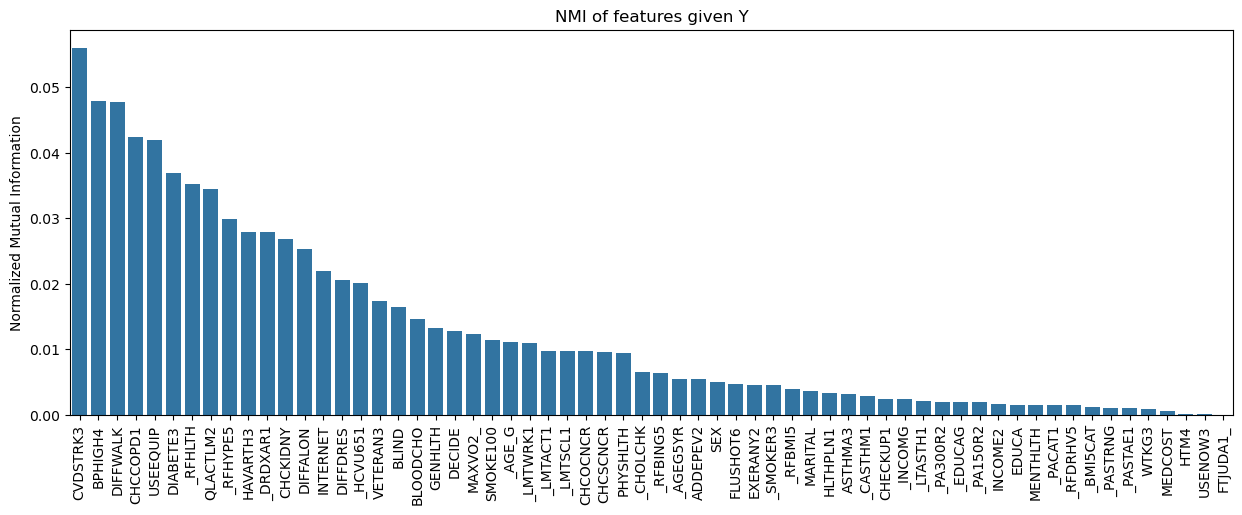

In [11]:
# print the entropies with the corresponding feature
print(list(zip(selected_features, NMI)))

# plot the NMI in seaborn in a bar plot (sorted by entropy)
# Sort the features by entropy
sorted_indices = np.argsort(NMI)[::-1]
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_entropies = [NMI[i] for i in sorted_indices]

# Plot the entropies
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_features, y=sorted_entropies)
plt.xticks(rotation=90)
plt.ylabel('Normalized Mutual Information')
plt.title('NMI of features given Y')
plt.show()


We observe from this that the most dependent features to the target are :
- CVDSTRK3 : "(Ever told) you had a stroke"
- BPHIGH4 : "Ever told you had high blood pressure"
- DIFFWALK : "Do you have serious difficulty walking or climbing stairs?"
- CHCCOPD1 : "(Ever told) you have Chronic Obstructive Pulmonary Disease or COPD, emphysema or chronic bronchitis?"
- USEEQUIP : "Do you now have any health problem that requires you to use special equipment, such as a cane, a wheelchair, a
special bed, or a special telephone? "

# Dimensionality Reduction

In [58]:
# Keep only the features with a NMI above a certain threshold
# threshold = 0.02
threshold = -1 # keep all features
selected_features_2 = [selected_features[i] for i in range(len(selected_features)) if NMI[i] > threshold]
x_train_filtered_2 = x_train_filtered[:, [selected_features.index(feature) for feature in selected_features_2]]
print(f"Selected {len(selected_features_2)} features over {len(selected_features)}")
print(x_train_filtered_2.shape)

Selected 62 features over 62
(328135, 62)


# Classification

## Fixing the class imbalance

In [13]:
from tqdm import tqdm
import numpy as np

def fix_class_imbalance(X, y, target_value=1):
    """
    Fix class imbalance by oversampling the minority class or undersampling the majority class.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n_samples, n_features)
    y (numpy.ndarray): Target vector of shape (n_samples,), containing values -1 and 1
    target_value (int): Class value to balance to (default is 1)
    
    Returns:
    X_balanced (numpy.ndarray): Feature matrix with balanced classes
    y_balanced (numpy.ndarray): Balanced target vector
    """
    # Separate samples by class
    class_1_indices = np.where(y == target_value)[0]
    class_minus_1_indices = np.where(y != target_value)[0]
    
    # Find class counts
    class_1_count = len(class_1_indices)
    class_minus_1_count = len(class_minus_1_indices)
    
    if class_1_count == class_minus_1_count:
        # If classes are already balanced, return the original data
        return X, y
    
    elif class_1_count < class_minus_1_count:
        # If class 1 is the minority, oversample class 1
        oversample_size = class_minus_1_count - class_1_count
        oversampled_indices = np.random.choice(class_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    else:
        # If class -1 is the minority, oversample class -1
        oversample_size = class_1_count - class_minus_1_count
        oversampled_indices = np.random.choice(class_minus_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    
    # Create the balanced dataset
    X_balanced = X[new_indices]
    y_balanced = y[new_indices]
    
    return X_balanced, y_balanced


# Usage:
# x_train_fixed, y_train_fixed = fix_class_imbalance(x_train_filtered_2, y_train[:, -1], target_value=1)
# print(x_train_fixed.shape)


## One Hot Encoding

In [14]:
# create a numpy array x_train_filtered_2_OHE with one hot encoding

def one_hot_encode(x_train_filtered, selected_features, selected_features_2):
    x_train_filtered_2_OHE = np.zeros((x_train_filtered.shape[0], 0))
    for feature in selected_features_2:
        feature_values = x_train_filtered[:, selected_features.index(feature)]
        unique_values = np.unique(feature_values)
        for value in unique_values:
            x_train_filtered_2_OHE = np.hstack((x_train_filtered_2_OHE, np.array([feature_values == value]).T))
    return x_train_filtered_2_OHE

x_train_filtered_2_OHE = one_hot_encode(x_train_filtered, selected_features, selected_features_2)
print(x_train_filtered_2_OHE.shape)
print(x_train_filtered_2_OHE)

(328135, 35)
[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 1.]]


## data splitting

In [15]:
# data splitting
def split_data(x, y, ratio=0.8):
    indices = np.random.permutation(x.shape[0])
    train_indices = indices[:int(ratio * x.shape[0])]
    test_indices = indices[int(ratio * x.shape[0]):]
    return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

y_train_mapped = (1+y_train[:,1])/2

x_train_filtered_2_OHE_train, y_train_train, x_train_filtered_2_OHE_test, y_train_test = split_data(x_train_filtered_2_OHE, y_train_mapped)

# fix class imbalance
x_train_filtered_2_OHE_train_fixed, y_train_train_fixed = fix_class_imbalance(x_train_filtered_2_OHE_train, y_train_train, target_value=1)
print(x_train_filtered_2_OHE_train_fixed.shape)


(478578, 35)


## Logistic Regression

In [16]:
from implementations import *

# Initialize the weights
initial_w = np.zeros(x_train_filtered_2_OHE_train_fixed.shape[1])
max_iters = 100
gamma = 0.1
lambda_ = 0.01

# Y values are 1 and -1, we need to convert them to 1 and 0
# Run the logistic regression
w, loss = reg_logistic_regression(y_train_train_fixed, x_train_filtered_2_OHE_train_fixed, lambda_, initial_w, max_iters, gamma)


Regularized Logistic Regression(0/99): loss=0.693147180559945, w0=-0.009363363965748531, w1=0.009363363965748531
Regularized Logistic Regression(1/99): loss=0.6808784651863432, w0=-0.018002651285901596, w1=0.01867328630241402
Regularized Logistic Regression(2/99): loss=0.6699794386269928, w0=-0.02603202685647605, w1=0.027840152008904884
Regularized Logistic Regression(3/99): loss=0.6601825653941895, w0=-0.03354014934701637, w1=0.03680281683694831
Regularized Logistic Regression(4/99): loss=0.6513087716920523, w0=-0.040596160354768145, w1=0.045521158878581595
Regularized Logistic Regression(5/99): loss=0.6432305831340079, w0=-0.047254425953683565, w1=0.053970422313851546
Regularized Logistic Regression(6/99): loss=0.6358514716766284, w0=-0.05355817669444485, w1=0.06213697208999574
Regularized Logistic Regression(7/99): loss=0.6290943057579194, w0=-0.0595422536489377, w1=0.07001513266381804
Regularized Logistic Regression(8/99): loss=0.6228948415593887, w0=-0.06523515947275678, w1=0.0776

In [17]:
def predict_logistic_regression(y, x, w):
    return np.array([1 if p > 0.5 else 0 for p in sigmoid(x @ w)])

# calculate the accuracy, precision, recall and F1 score
def accuracy_precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return accuracy, precision, recall, f1

# Predict the values
y_pred_train = predict_logistic_regression(y_train_train, x_train_filtered_2_OHE_train, w)
y_pred_test = predict_logistic_regression(y_train_test, x_train_filtered_2_OHE_test, w)

print(y_pred_train)
# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_train, y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_train_test, y_pred_test)

print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")

[1 0 0 ... 0 0 1]
Train accuracy: 0.7420992884026392, precision: 0.21712919390532393, recall: 0.7352599164477368, F1: 0.33525455348814376
Test accuracy: 0.7432154448626328, precision: 0.21537040837266572, recall: 0.7293259207783183, F1: 0.33254119138149557


## TESTS WITH SKLEARN

In [20]:
# apply MCA (Multiple classification analysis)
import pandas as pd
import prince

X = pd.DataFrame(x_train_filtered_2, columns=selected_features_2)
# set all dtypes to string in X
X = X.astype(str)
print(X)

       BPHIGH4 CVDSTRK3 CHCCOPD1 HAVARTH3 CHCKIDNY DIABETE3 INTERNET QLACTLM2  \
0          0.0      0.0      0.0      0.0      0.0      0.0      1.0      1.0   
1          1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2          0.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
3          0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
328130     1.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
328131     0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
328132     0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
328133     0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
328134     1.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   

       USEEQUIP DIFFWALK DI

In [34]:
mca = prince.MCA(n_components=5)
mca = mca.fit(X)
mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.

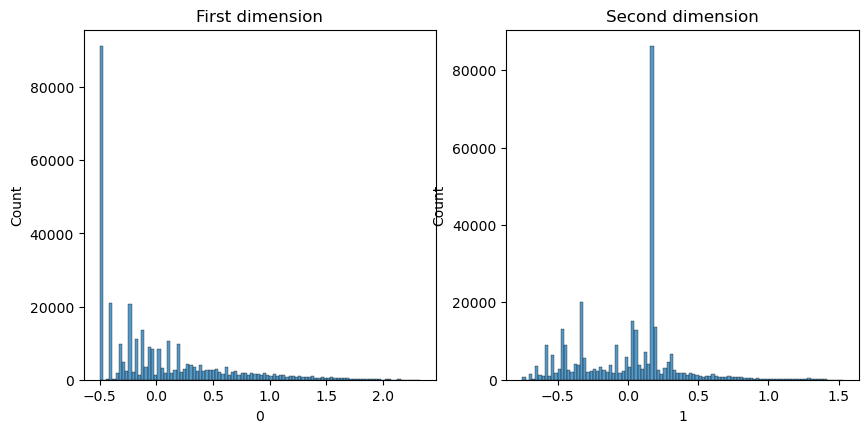

In [35]:
# plot histogram of the first two dimensions using seaborn
plt.figure(figsize=(10, 10))
# first dimension
plt.subplot(2, 2, 1)
sns.histplot(mca.iloc[:, 0], bins=100)
plt.title('First dimension')
# second dimension
plt.subplot(2, 2, 2)
sns.histplot(mca.iloc[:, 1], bins=100)
plt.title('Second dimension')
plt.show()


In [38]:
# logistic regression

x_train_mca, y_train_mca, x_test_mca, y_test_mca = split_data(mca.to_numpy(), y_train_mapped)

# fix class imbalance
x_train_mca_fixed, y_train_mca_fixed = fix_class_imbalance(x_train_mca, y_train_mca, target_value=1)

# Initialize the weights
initial_w = np.zeros(x_train_mca_fixed.shape[1])
max_iters = 1000
gamma = 0.1
lambda_ = 0

# Run the logistic regression
w, loss = reg_logistic_regression(y_train_mca_fixed, x_train_mca_fixed, lambda_, initial_w, max_iters, gamma)


Regularized Logistic Regression(0/999): loss=0.693147180559945, w0=0.015608228520368361, w1=-0.0018180553387894148
Regularized Logistic Regression(1/999): loss=0.6906328247309305, w0=0.031033390844158744, w1=-0.0036437237755170262
Regularized Logistic Regression(2/999): loss=0.6881756024835682, w0=0.046277689705290365, w1=-0.005476803589434191
Regularized Logistic Regression(3/999): loss=0.6857741654871097, w0=0.06134333524198785, w1=-0.007317089238002945
Regularized Logistic Regression(4/999): loss=0.6834271876074957, w0=0.07623254236110814, w1=-0.009164371916296654
Regularized Logistic Regression(5/999): loss=0.6811333654827922, w0=0.09094752823214827, w1=-0.01101844009073404
Regularized Logistic Regression(6/999): loss=0.6788914190109959, w0=0.10549050991110996, w1=-0.012879080006846623
Regularized Logistic Regression(7/999): loss=0.676700091754743, w0=0.11986370209371232, w1=-0.014746076170960486
Regularized Logistic Regression(8/999): loss=0.6745581512675001, w0=0.1340693149968088

In [39]:
# Predict the values
y_pred_train = predict_logistic_regression(y_train_mca, x_train_mca, w)
y_pred_test = predict_logistic_regression(y_test_mca, x_test_mca, w)

# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_mca, y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_test_mca, y_pred_test)

print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")

Train accuracy: 0.6324226309293431, precision: 0.1764274803768354, recall: 0.8614044919601672, F1: 0.29287096206835905
Test accuracy: 0.6323464427750773, precision: 0.17540508030849783, recall: 0.8580823814468674, F1: 0.29127012101985666


In [60]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tqdm import tqdm  # Import tqdm for the progress bar

le = LabelEncoder()
x_train_encoded = np.apply_along_axis(le.fit_transform, 0, x_train_filtered_2)

# fix class imbalance
x_train_encoded_fixed, y_train_fixed = fix_class_imbalance(x_train_encoded, y_train_mapped, target_value=1)

# Function to calculate F1 score for given features
def calculate_f1(x_train, y_train, x_test, y_test, selected_features):
    model = CategoricalNB()
    
    # Select only the current features for training
    x_train_selected = x_train[:, selected_features]
    x_test_selected = x_test[:, selected_features]
    
    # Train the model
    model.fit(x_train_selected, y_train)
    
    # Predict the values
    y_pred_train = model.predict(x_train_selected)
    y_pred_test = model.predict(x_test_selected)
    
    # Calculate F1 score on the test set
    f1 = f1_score(y_test, y_pred_test)
    
    return f1

# Greedy algorithm to select features with tqdm progress bar
def greedy_feature_selection(x_train, y_train, x_test, y_test):
    n_features = x_train.shape[1]  # Total number of features
    selected_features = []  # Initialize with no features
    remaining_features = list(range(n_features))  # All features are initially candidates
    
    best_f1 = 0
    progress_bar = tqdm(total=n_features, desc="Selecting Features")  # Initialize tqdm progress bar
    
    while remaining_features:
        # Track the best feature and F1 score in the current iteration
        best_feature = None
        best_f1_iteration = 0
        
        # Try adding each remaining feature and evaluate F1 score
        for feature in tqdm(remaining_features, desc="Evaluating Features", leave=False):
            current_features = selected_features + [feature]  # Add feature to the selected set
            f1 = calculate_f1(x_train, y_train, x_test, y_test, current_features)
            
            # Check if the current F1 score is the best so far
            if f1 > best_f1_iteration:
                best_f1_iteration = f1
                best_feature = feature
        
        # Stop if no improvement is made
        if best_f1_iteration <= best_f1:
            break
        
        # Update selected features and remaining features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_f1 = best_f1_iteration
        print(f"Best F1 score: {best_f1}")
        print(f"Selected features: {selected_features}")
        
        progress_bar.update(1)  # Update the progress bar
        
    progress_bar.close()  # Close the progress bar when done
    return selected_features, best_f1

# Example usage
# Assuming x_train_encoded and y_train_mapped have been preprocessed as in the original code

# Split the data (already done in your previous code)
x_train_encoded_train, y_train_train, x_train_encoded_test, y_train_test = split_data(x_train_encoded_fixed, y_train_fixed)

# Perform greedy feature selection with progress bar
selected_features_greedy, best_f1 = greedy_feature_selection(x_train_encoded_train, y_train_train, x_train_encoded_test, y_train_test)

print(f"Selected features: {selected_features_greedy}")
print(f"Best F1 score: {best_f1}")


Best F1 score: 0.7201138965931756
Selected features: [52]


Best F1 score: 0.7478287889380875
Selected features: [52, 0]


Best F1 score: 0.7578821853320119
Selected features: [52, 0, 37]


Best F1 score: 0.7601049630587505
Selected features: [52, 0, 37, 43]


Best F1 score: 0.7624172639329495
Selected features: [52, 0, 37, 43, 31]


Best F1 score: 0.7661013243378311
Selected features: [52, 0, 37, 43, 31, 8]


Best F1 score: 0.7705533994093362
Selected features: [52, 0, 37, 43, 31, 8, 12]


Best F1 score: 0.7713379716558499
Selected features: [52, 0, 37, 43, 31, 8, 12, 38]


Best F1 score: 0.7737819760991537
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17]


Best F1 score: 0.7777372146915971
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17, 28]


Best F1 score: 0.7781954887218046
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17, 28, 4]


Best F1 score: 0.7779986008649199
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17, 28, 4, 50]


Best F1 score: 0.777783962151632
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17, 28, 4, 50, 51]


Best F1 score: 0.7773487568565947
Selected features: [52, 0, 37, 43, 31, 8, 12, 38, 17, 28, 4, 50, 51, 32]


KeyboardInterrupt: 

In [65]:
selected_features_greedy = [52, 0, 37, 43, 31, 8, 12, 38, 17, 28, 4]
feature_names = [selected_features_2[i] for i in selected_features_greedy]
print(feature_names)

# Select only the current features for training
x_train_selected = x_train_encoded_train[:, selected_features_greedy]
x_test_selected = x_train_encoded_test[:, selected_features_greedy]

# Train the model
model = CategoricalNB()
model.fit(x_train_selected, y_train_train)

# Predict the values
y_pred_train = model.predict(x_train_selected)
y_pred_test = model.predict(x_test_selected)

# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_train, y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_train_test, y_pred_test)

print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")

['MAXVO2_', 'GENHLTH', '_RFHYPE5', '_AGE_G', 'SMOKE100', 'CVDSTRK3', 'CHCCOPD1', '_CHOLCHK', 'SEX', 'DIFFWALK', 'MEDCOST']
Train accuracy: 0.7646013003075277, precision: 0.7383600688882371, recall: 0.8200273122491679, F1: 0.7770538058651618
Test accuracy: 0.7662956277577216, precision: 0.7390963737439173, recall: 0.8216624516388363, F1: 0.7781954887218047


In [66]:
# fit the model on the whole train set and get the predictions for the real test set
x_test = np.genfromtxt("data/x_test.csv",delimiter=",", skip_header=1)

In [75]:
# apply the same mapping to the test set
x_test_filtered = np.zeros((x_test.shape[0], len(selected_features)))
for feature in selected_features:
    feature_values = x_test[:, features == feature].flatten()
    if feature_values.size > 0:
        x_test_filtered[:, selected_features.index(feature)] = np.array([mapping_dict[feature](value) for value in feature_values])

# apply labelEncoder
x_test_encoded = np.apply_along_axis(le.transform, 0, x_test_filtered)
# keep only greedy slected features
x_test_encoded_selected = x_test_encoded[:, selected_features_greedy]

Selecting Features:  23%|██▎       | 14/62 [2:19:03<7:56:45, 595.95s/it]


ValueError: y contains previously unseen labels: [10.0, 20.0, 30.0]

In [68]:
x_train_selected = x_train_encoded_fixed[:, selected_features_greedy]

model = CategoricalNB()
model.fit(x_train_selected, y_train_fixed)

# Predict the values
y_pred_test = model.predict(x_test_encoded_selected)
y_pred_train = model.predict(x_train_selected)

# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_fixed, y_pred_train)
print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")

Train accuracy: 0.7649017248295227, precision: 0.7384847335825072, recall: 0.8202868030485359, F1: 0.7772393413338653


In [74]:
print(np.sum(y_pred_train == 1)/len(y_pred_train))


0.5


In [72]:
# save to csv with header Id and Prediction
Ids = x_test[:,0]
y_pred_test_final = 2*y_pred_test-1

# get proportion of 1
print(np.sum(y_pred_test_final == 1)/len(y_pred_test_final))

np.savetxt("data/submission_CategoricalNB_1.csv", np.array([Ids, y_pred_test_final]).T, delimiter=",", fmt="%d", header="Id,Prediction", comments="")

0.3360425675860997


In [105]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)

In [104]:
final_features = ['MAXVO2_', 'GENHLTH', '_RFHYPE5', '_AGE_G', 'SMOKE100', 'CVDSTRK3', 'CHCCOPD1', '_CHOLCHK', 'SEX', 'DIFFWALK', 'MEDCOST']
final_features = list(mapping_dict.keys())
def cleaning_x_pipeline(x_train, y_train, x_test, features):
    # keep only features with less than 10% nan values
    selected_features = select_features_with_low_nan_ratio(x_train, features, threshold=0.1)
    # cleaning
    x_train_filtered_mapped = apply_mapping(x_train, selected_features, mapping_dict)
    x_test_filtered_mapped = apply_mapping(x_test, selected_features, mapping_dict)

    # Label encoding
    le = LabelEncoder()
    combined = np.vstack((x_train_filtered_mapped, x_test_filtered_mapped))
    combined_encoded = np.apply_along_axis(le.fit_transform, 0, combined)
    x_train_encoded = combined_encoded[:x_train_filtered_mapped.shape[0], :]
    x_test_encoded = combined_encoded[x_train_filtered_mapped.shape[0]:, :]

    # fix class imbalance in the training set
    x_train_encoded_fixed, y_train_fixed = fix_class_imbalance(x_train_encoded, y_train, target_value=1)

    return x_train_encoded, x_train_encoded_fixed, y_train_fixed, x_test_encoded

y_train_mapped = (1+y_train[:,1])/2 
x_train_encoded, x_train_encoded_fixed, y_train_fixed, x_test_encoded = cleaning_x_pipeline(x_train, y_train_mapped, x_test, final_features)
# print shape
print(x_train_encoded_fixed.shape)
print(x_test_encoded.shape)

model = CategoricalNB()
model.fit(x_train_encoded_fixed, y_train_fixed)

# Predict the values
y_pred_train = model.predict(x_train_encoded)
y_pred_test = model.predict(x_test_encoded)

# Calculate the metrics for train
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_mapped, y_pred_train)
print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")



Selected 79 features over 79
{'GENHLTH': 0.0, 'PHYSHLTH': 0.0, 'MENTHLTH': 0.0, 'POORHLTH': 0.0, 'HLTHPLN1': 0.0, 'MEDCOST': 0.0, 'CHECKUP1': 0.0, 'BPHIGH4': 0.0, 'BPMEDS': 0.0, 'BLOODCHO': 0.0, 'CHOLCHK': 0.0, 'TOLDHI2': 0.0, 'CVDSTRK3': 0.0, 'ASTHMA3': 0.0, 'ASTHNOW': 0.0, 'CHCSCNCR': 0.0, 'CHCOCNCR': 0.0, 'CHCCOPD1': 0.0, 'HAVARTH3': 0.0, 'ADDEPEV2': 0.0, 'CHCKIDNY': 0.0, 'DIABETE3': 0.0, 'SEX': 0.0, 'MARITAL': 0.0, 'EDUCA': 0.0, 'VETERAN3': 0.0, 'INCOME2': 0.0, 'INTERNET': 0.0, 'WTKG3': 0.0, 'QLACTLM2': 0.0, 'USEEQUIP': 0.0, 'BLIND': 0.0, 'DECIDE': 0.0, 'DIFFWALK': 0.0, 'DIFFDRES': 0.0, 'DIFFALON': 0.0, 'SMOKE100': 0.0, 'SMOKDAY2': 0.0, 'LASTSMK2': 0.0, 'USENOW3': 0.0, 'AVEDRNK2': 0.0, 'DRNK3GE5': 0.0, 'EXERANY2': 0.0, 'LMTJOIN3': 0.0, 'FLUSHOT6': 0.0, 'PDIABTST': 0.0, 'PREDIAB1': 0.0, 'INSULIN': 0.0, 'CIMEMLOS': 0.0, '_RFHLTH': 0.0, '_HCVU651': 0.0, '_RFHYPE5': 0.0, '_CHOLCHK': 0.0, '_RFCHOL': 0.0, '_LTASTH1': 0.0, '_CASTHM1': 0.0, '_DRDXAR1': 0.0, '_AGEG5YR': 0.0, '_AGE_G': 0.0, 

KeyboardInterrupt: 

In [91]:
Ids = x_test[:,0]
y_pred_test_final = 2*y_pred_test-1

np.savetxt("data/submission_CategoricalNB_2.csv", np.array([Ids, y_pred_test_final]).T, delimiter=",", fmt="%d", header="Id,Prediction", comments="")